A Jupyter Notebook that fetches data from a URL in CSV format and generates various plots:
* Temperature: Visualize the temperature over time.
* Daily Mean Temperature: Calculate and plot the average temperature for each day.
* Monthly Mean Temperature: Calculate and plot the average temperature for each month.
* Windspeed: Visualize the windspeed over time.
* Rolling Windspeed: Calculate and plot the rolling windspeed over a 24-hour period.
* Daily Max Windspeed: Find and plot the maximum wind speed for each day.
* Monthly Mean of Daily Max Windspeeds: Calculate and plot the monthly average of the daily maximum wind speeds.

The data set is obtained from https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv

Author: Tomasz Uszynski

***

### Preparing the data:

First of all is necessary to organise libraries. 

In [1]:
# Importing the required libraries.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates
from matplotlib.ticker import AutoMinorLocator
import warnings
import logging

To avoid unexpected warnings, a logWarning() function is created.

For information about `logging` visit the [Sentry website](https://blog.sentry.io/logging-in-python-a-developers-guide/). For information about `warnings.showwarning` visit [Python Official Documentation](https://docs.python.org/3/library/warnings.html#warnings.showwarning).

In [2]:
# Configure the logger to include timestamps
logging.basicConfig(level=logging.INFO, filename="warnings.log", filemode="a",
                    format="%(asctime)s %(levelname)s %(message)s", datefmt="%Y-%m-%d %H:%M:%S")

# Log warnings with timestamps
def logWarning(message, category, filename, lineno, file=None, line=None):
    """
    Custom warning handler that logs warnings to a file with a timestamp.

    Parameters:
    - message (str): The warning message.
    - category (Warning): The class of the warning (e.g., UserWarning, DeprecationWarning).
    - filename (str): The name of the source file where the warning was triggered.
    - lineno (int): The line number where the warning was triggered.
    - file (file-like object, optional): The file where the warning is being triggered (usually None).
    - line (str, optional): The line of code where the warning was triggered (usually None).
    
    The function logs the warning message along with its category, filename, and line number to a log file.
    """
    logging.info(f'{filename}:{lineno}: {category.__name__}: {message}') 

# Set filter to log warnings
warnings.showwarning = logWarning


The next step is reading data from the CSV file. Check the [GeeksforGeeks website](https://www.geeksforgeeks.org/python-read-csv-using-pandas-read_csv/#:~:text=df%20%3D%20pd.read_csv(%22people.csv%22)) to find out more about reading the data from CSV file into Python.
In this case, removing 23 rows from the data set is mandatory. The skipped rows represent the description of the data set. To learn how to examine the data set, visit the [W3school website](https://www.w3schools.com/python/pandas/pandas_analyzing.asp).

In [3]:
# Taking data from the URL and dropping 23 rows from the top.
df = pd.read_csv('https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv', skiprows=23)
# Displaying the first 3 rows of the data to look at the data.
df.head(3)

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7


Checking data types.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248394 entries, 0 to 248393
Data columns (total 21 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    248394 non-null  object 
 1   ind     248394 non-null  int64  
 2   rain    248394 non-null  object 
 3   ind.1   248394 non-null  int64  
 4   temp    248394 non-null  float64
 5   ind.2   248394 non-null  int64  
 6   wetb    248394 non-null  float64
 7   dewpt   248394 non-null  float64
 8   vappr   248394 non-null  float64
 9   rhum    248394 non-null  int64  
 10  msl     248394 non-null  object 
 11  ind.3   248394 non-null  int64  
 12  wdsp    248394 non-null  object 
 13  ind.4   248394 non-null  int64  
 14  wddir   248394 non-null  object 
 15  ww      248394 non-null  object 
 16  w       248394 non-null  object 
 17  sun     248394 non-null  float64
 18  vis     248394 non-null  object 
 19  clht    248394 non-null  object 
 20  clamt   248394 non-null  object 
dtypes: float64

For plotting, it is necessary to convert the date columns to the datetime format. To see how to do it, visit the [GeeksforGeeks website](https://www.geeksforgeeks.org/python-pandas-to_datetime/#:~:text=Example%202%3A%20Converting%20Time%20Format%20using%20Pandas).



In [5]:
# Convert date column to datetime 
df['date'] = pd.to_datetime(df['date'])

Checking if the data type is converted correctly. Visit the [GeeksforGeeks website](https://www.geeksforgeeks.org/pandas-dataframe-dtypes/#:~:text=How%20to%20Check%20Datatype%20of%20Column%20in%20Pandas) to see how to check a datatype.

In [6]:
# Check the data type of only the 'date' column
date_column_dtype = df['date'].dtype
print("Data type of 'date' column is: ", date_column_dtype)

Data type of 'date' column is:  datetime64[ns]


Setting the 'date' column as the index of the dataframe and checking the result. You can find how to set an index on the [GeeksforGeeks website](https://www.geeksforgeeks.org/python-pandas-dataframe-set_index/).


In [7]:
df.set_index('date', inplace=True) 
df.head(3)

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
date,,,,,,,,,,,,,,,,,,,,
1996-04-10 14:00:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,1016.7,0,0,0,0,25,81,0.0,35000,32,5
1996-07-31 08:00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,1011.4,0,0,0,0,25,82,0.0,40000,45,5
1996-07-31 09:00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,1011.4,0,0,0,0,80,81,0.0,8000,32,7


Identifying missing values in the data set. The easiest way to find expected missing values is using `dataframe.isin(values)` method combined with `sum()`.  To see how to use `isin()` visit the [W2school website](https://www.w3schools.com/python/pandas/ref_df_isin.asp), and to know about `sum()` visit the [Programiz website](https://www.programiz.com/python-programming/pandas/methods/sum).

In [8]:
# Checking for different representations of missing values 
missingData = df.isin(['', ' ', 'NA', 'NaN', 'null']).sum()
print(missingData)

ind          0
rain        49
ind.1        0
temp         0
ind.2        0
wetb         0
dewpt        0
vappr        0
rhum         0
msl         18
ind.3        0
wdsp        50
ind.4        0
wddir       52
ww       55486
w        55487
sun          0
vis      62581
clht        18
clamt       18
dtype: int64


***

### Plotting:

***

To create plots using **Seaborn** for visualising time-series data, the data can be selected and, if necessary, filtered by a specific date range. The plot's appearance can then be customised using **Matplotlib**. The figure size can be adjusted, and titles, labels, and axes can be customised. The appearance of the plot can also be fine-tuned with grid lines and minor ticks. The `tight_layout()` method ensures that labels and elements are properly spaced. This template also shows how to filter data for specific time periods and calculate daily mean values. For a wide range of data, it is good to change the figure size as it makes the plotted data more readable.
All available options for plotting and customization can be explored on the [Matplotlib Official Website](https://matplotlib.org) and [Seaborn Official Documentation](https://seaborn.pydata.org/generated/seaborn.lineplot.html), where detailed explanations of every feature and numerous examples for creating professional visualizations are provided.

#### Plot temperature over time.

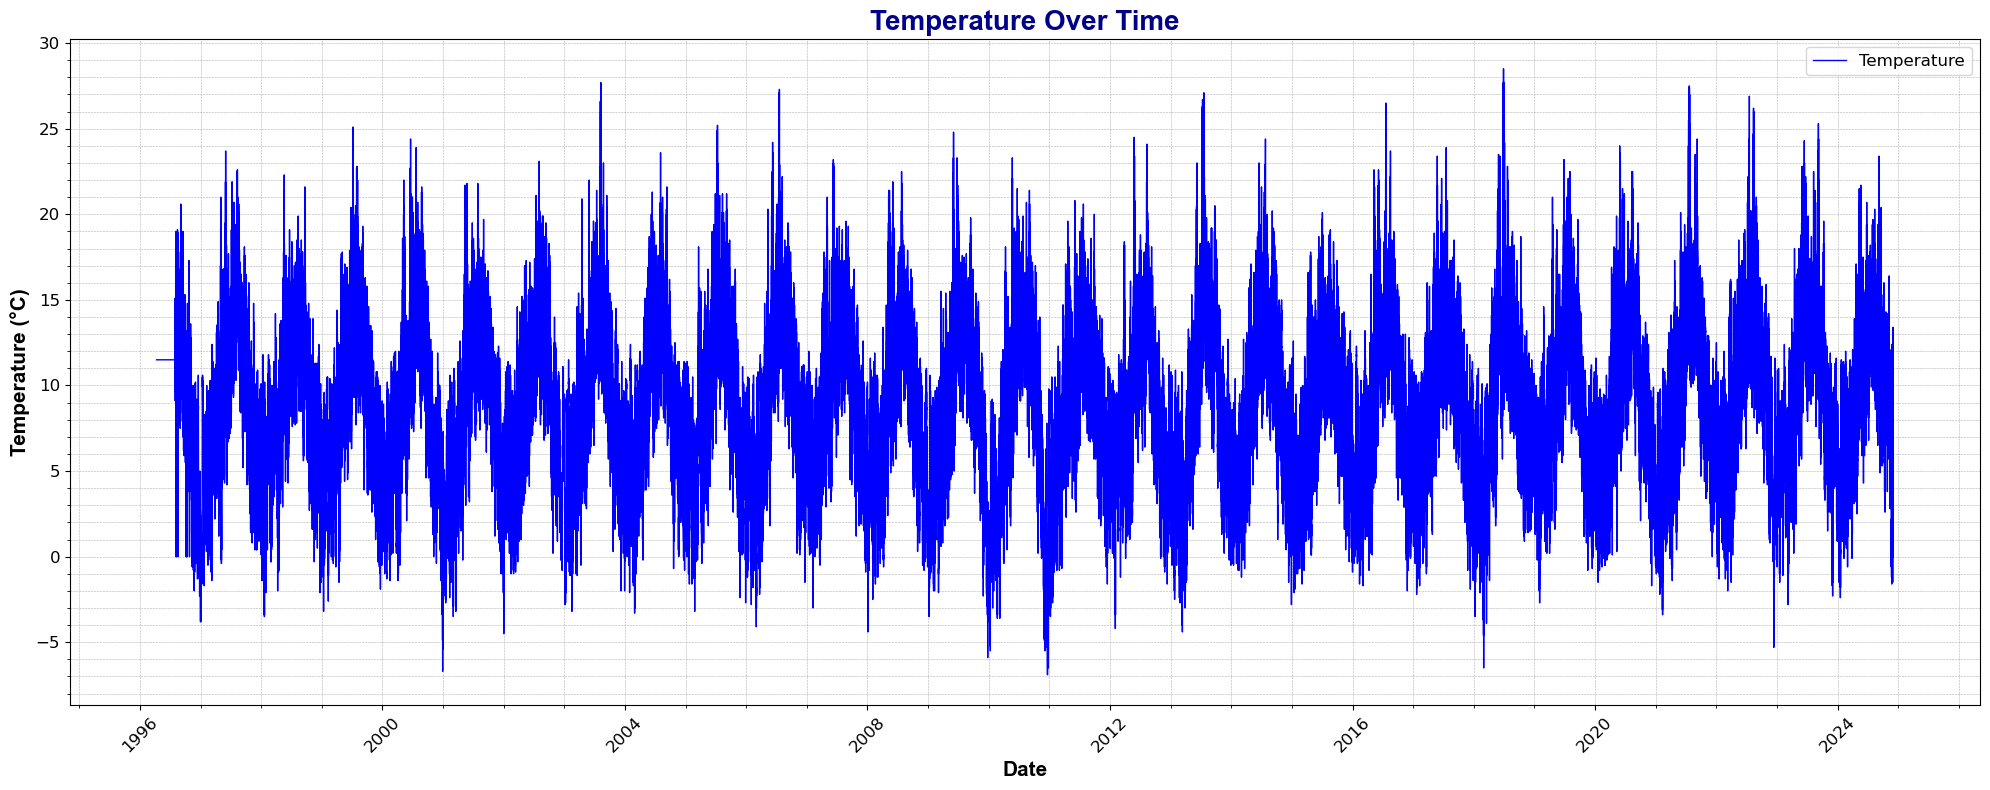

In [9]:
# Adjusted figure size
plt.figure(figsize=(20, 8))

# Plot with Seaborn
sns.lineplot(data=df, x="date", y="temp", color='blue', linestyle='-', linewidth=1)
plt.title('Temperature Over Time', fontsize=20, fontweight='bold', fontname='Arial', color='darkblue')
plt.xlabel('Date', fontsize=15, fontweight='bold', fontname='Arial')
plt.ylabel('Temperature (°C)', fontsize=15, fontweight='bold', fontname='Arial')
plt.grid(True, which='both', linestyle='--', linewidth=0.4)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.minorticks_on()
plt.legend(['Temperature'], loc='upper right', fontsize=12)
# Adjust layout to fit labels
plt.tight_layout()
plt.show()


With such a large amount of data, a clear visualisation of the results is impossible. A much narrower range of observations can be selected for a more precise result.   
How to select a range of data is explained on the [Saturncloud website](https://saturncloud.io/blog/how-to-select-date-range-from-pandas-dataframe/#:~:text=range%20of%20dates.-,%23%20Select%20a%20date%20range%20from%20the%20DataFrame,-date_range%20%3D%20df).


Here is the sample:

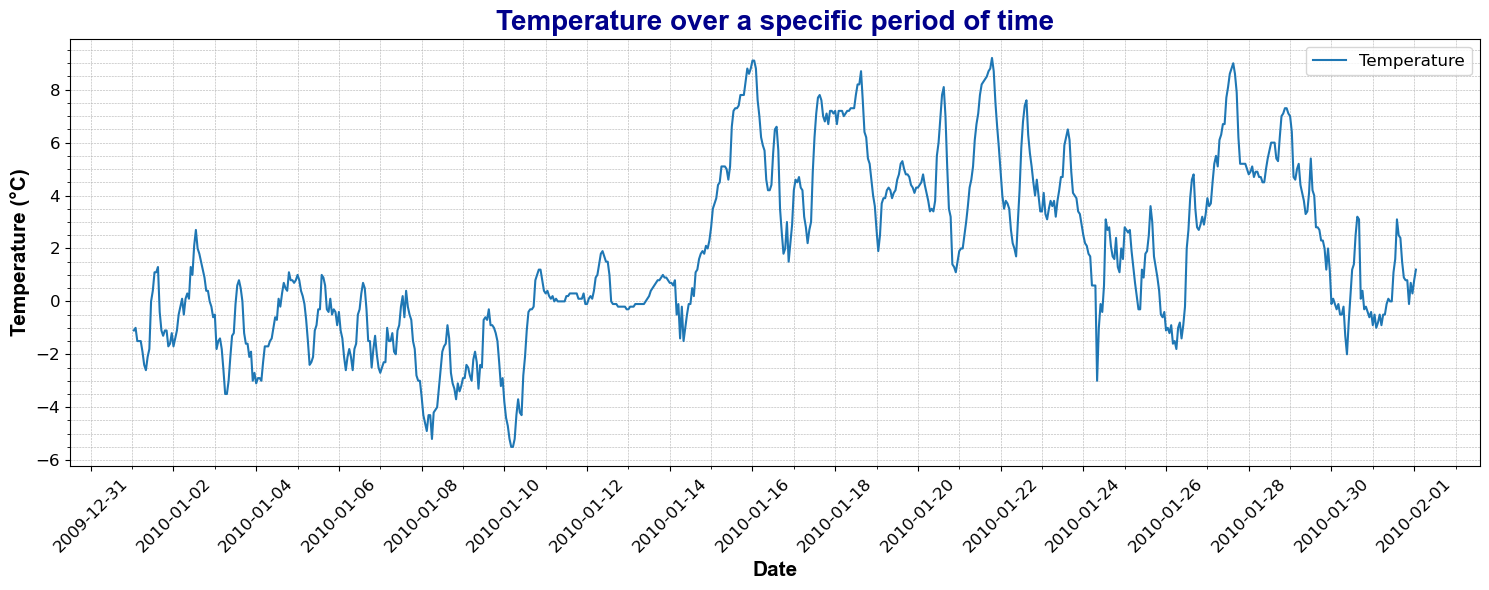

In [10]:
# Filter data for a specific date range 
dateFrom = "2010-01-01 01:00:00"
dateTo = "2010-02-01 01:00:00" 
filteredDf = df.loc[dateFrom:dateTo]

# Plot with Seaborn
plt.figure(figsize=(15, 6))
sns.lineplot(data=filteredDf, x="date", y="temp")
plt.title('Temperature over a specific period of time', fontsize=20, fontweight='bold', fontname='Arial', color='darkblue')
plt.xlabel('Date', fontsize=15, fontweight='bold', fontname='Arial')
plt.ylabel('Temperature (°C)', fontsize=15, fontweight='bold', fontname='Arial')
plt.grid(True, which='both', linestyle='--', linewidth=0.4)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Customize x-axis ticks and labels
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))  # Set major ticks to every day
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format the ticks to show date only
ax.xaxis.set_minor_locator(mdates.DayLocator()) # Set minor ticks to every day

# Add minor ticks on y-axis 
ax.yaxis.set_minor_locator(AutoMinorLocator())

plt.legend(['Temperature'], loc='upper right', fontsize=12)
# Adjust layout to fit labels
plt.tight_layout()
plt.show()


The usage of `matplotlib.dates` is explained on the [Matplotlib website](https://matplotlib.org/stable/api/dates_api.html),, and information about `matplotlib.ticker` is also provided on the [Mathplotlib website](https://matplotlib.org/stable/api/ticker_api.html). The usage of `Autolocator` is definedon [Matplotlib website](https://matplotlib.org/stable/api/ticker_api.html#matplotlib.ticker.AutoMinorLocator).

***

#### Plot of mean temperature for each day.

Details on how to perform resampling can be found on the [Medium website](https://medium.com/@abelkuriakose/data-resampling-using-python-78fbcef91e02#:~:text=Python%20Libraries%20for%20Data%20Resampling).

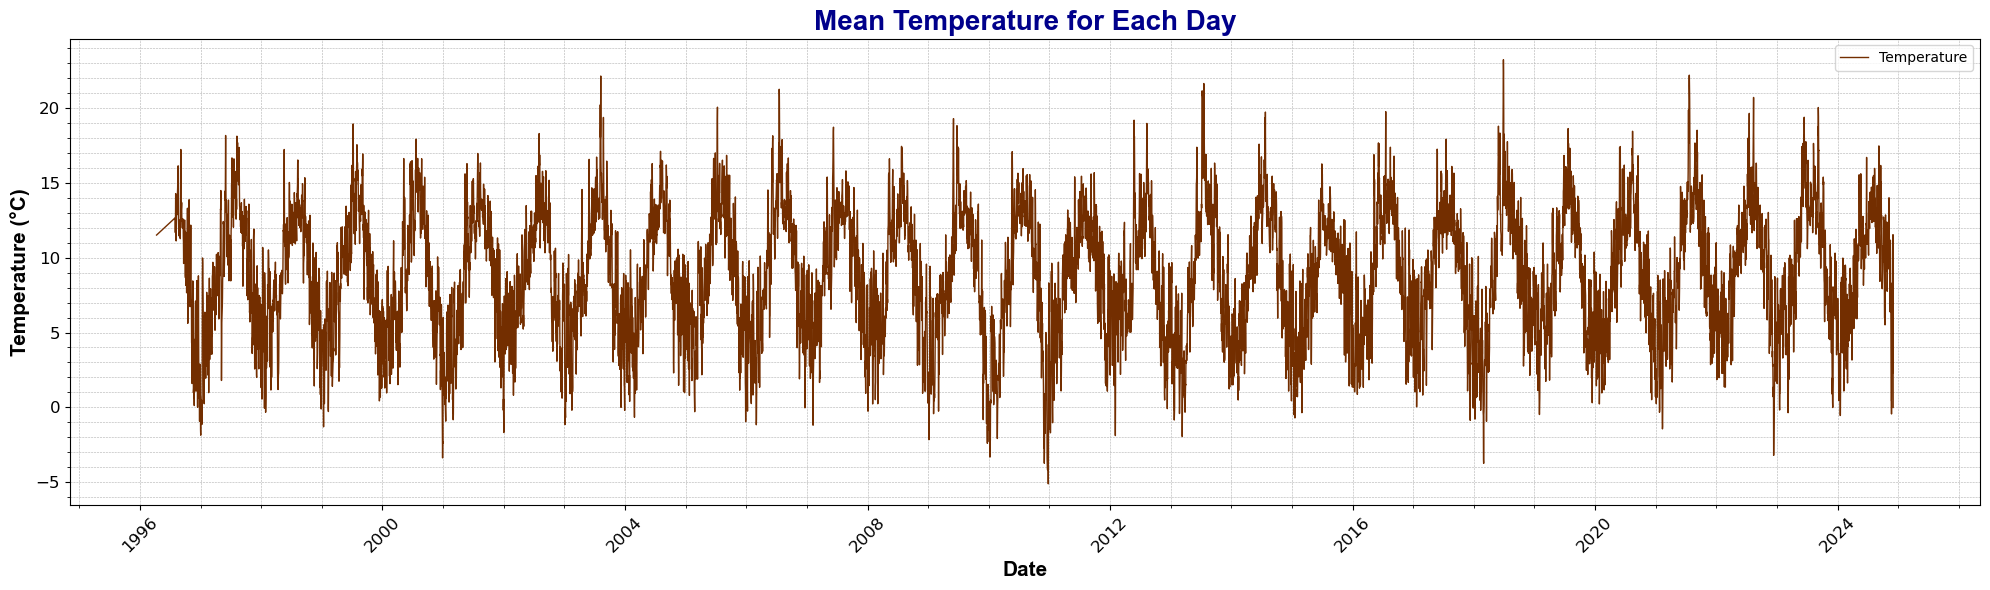

In [11]:
# Calculate the mean temperature for each day
dailyMeanTemp = df['temp'].resample('D').mean()

# Plot with Seaborn
plt.figure(figsize=(20, 6))
sns.lineplot(data=dailyMeanTemp, color='#732E00', linestyle='-', linewidth=1)
plt.title('Mean Temperature for Each Day', fontsize=20, fontweight='bold', fontname='Arial', color='darkblue')
plt.xlabel('Date', fontsize=15, fontweight='bold', fontname='Arial')
plt.ylabel('Temperature (°C)', fontsize=15, fontweight='bold', fontname='Arial')
plt.grid(True, which='both', linestyle='--', linewidth=0.4)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.minorticks_on()
plt.legend(['Temperature'], loc='upper right', fontsize=10)
# Adjust layout to fit labels
plt.tight_layout()
plt.show()

As previously mentioned, with that amount of data, it's hard to analyse. Selecting a different amount of data makes the plot much clearer. 

Here is the sample:

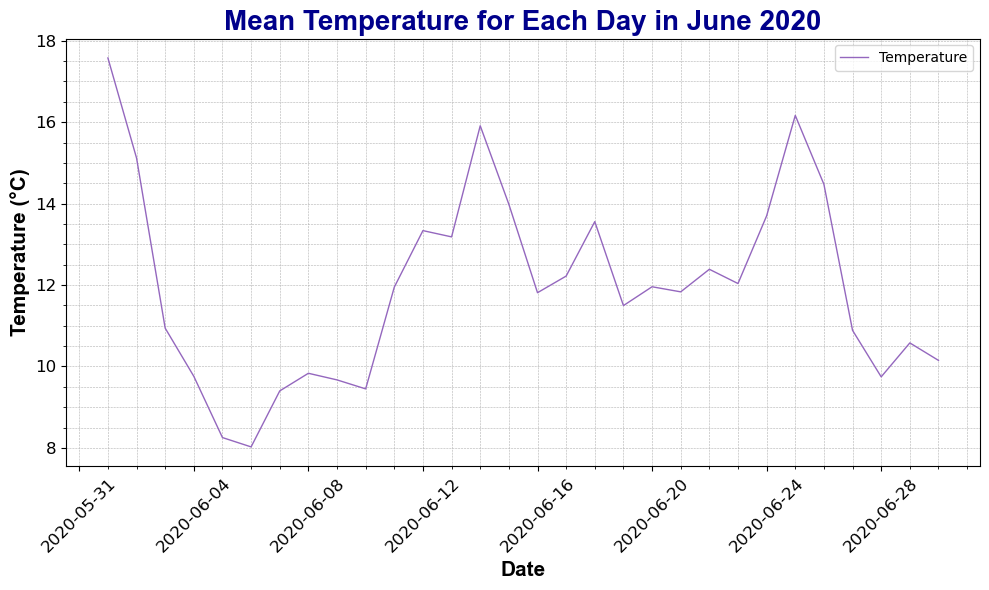

In [12]:
# Filter data for a specific period of time.
startDate = "2020-06-01 01:00:00"
endDate = "2020-06-30 01:00:00"
filteredDf = df.loc[startDate:endDate]

# Calculate the mean temperature for each day in the filtered data
dailyMeanTemp = filteredDf['temp'].resample('D').mean()

# Plot with Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=dailyMeanTemp, color='#9467be', linestyle='-', linewidth=1)
plt.title('Mean Temperature for Each Day in June 2020', fontsize=20, fontweight='bold', fontname='Arial', color='darkblue')
plt.xlabel('Date', fontsize=15, fontweight='bold', fontname='Arial')
plt.ylabel('Temperature (°C)', fontsize=15, fontweight='bold', fontname='Arial')
plt.grid(True, which='both', linestyle='--', linewidth=0.4)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Customize x-axis ticks and labels
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=4))  # Set major ticks to every day
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format the ticks to show date only
ax.xaxis.set_minor_locator(mdates.DayLocator()) # Set minor ticks by default every day

# Add minor ticks on y-axis 
ax.yaxis.set_minor_locator(AutoMinorLocator())  # Set minor ticks on y-axis

plt.legend(['Temperature'], loc='upper right', fontsize=10)
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

***

#### Plot of the mean temperature for each month.

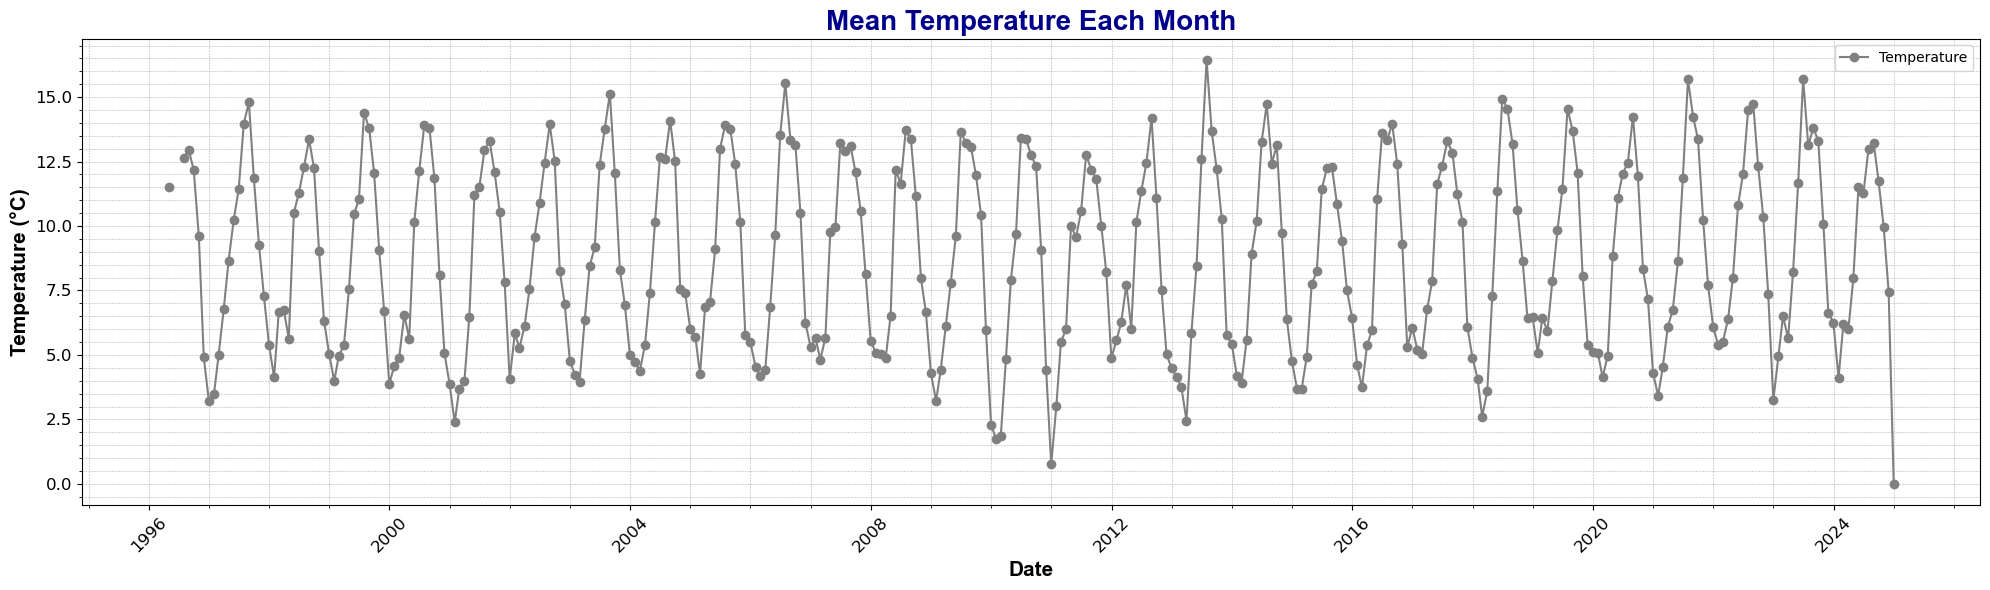

In [13]:
# Calculate the mean temperature for each month
monthlyMeanTemp = df['temp'].resample('M').mean()

# Plot with Matplotlib
plt.figure(figsize=(20, 6))
#sns.lineplot(monthlyMeanTemp,  marker='o', markersize=5, color='grey',linestyle='-', linewidth=1 )
plt.plot(monthlyMeanTemp.index, monthlyMeanTemp, marker='o', linestyle='-', color='grey')
plt.title('Mean Temperature Each Month', fontsize=20, fontweight='bold', fontname='Arial', color='darkblue')
plt.xlabel('Date', fontsize=15, fontweight='bold', fontname='Arial')
plt.ylabel('Temperature (°C)', fontsize=15, fontweight='bold', fontname='Arial')
plt.grid(True, which='both', linestyle='--', linewidth=0.4)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.minorticks_on()
plt.legend(['Temperature'], loc='upper right', fontsize=10)
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

***

#### Plot the windspeed over time.

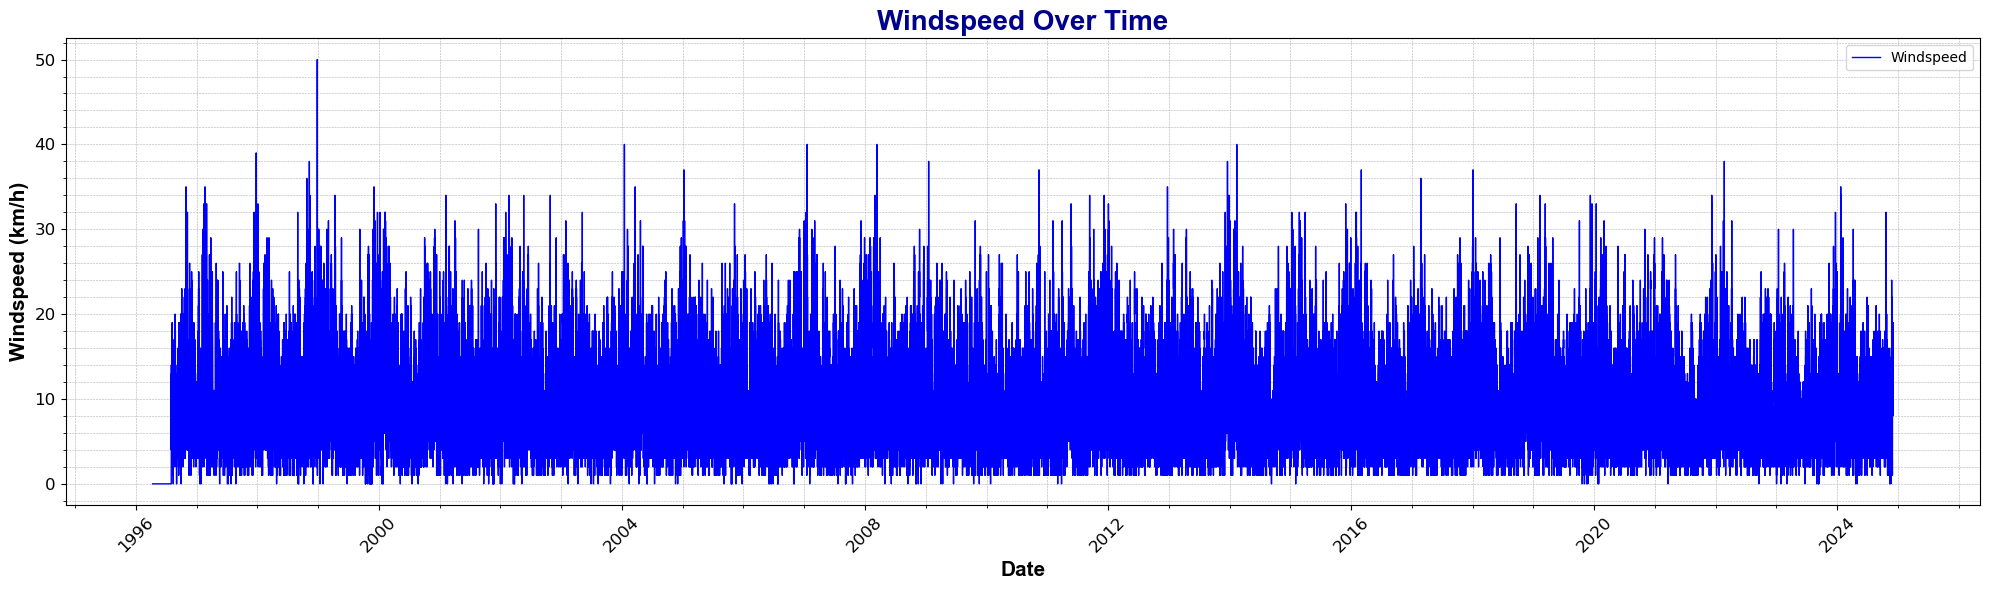

In [14]:
# Convert windspeed to numeric, coercing errors to NaN 
df['wdsp'] = pd.to_numeric(df['wdsp'], errors='coerce')

# Handling missing data by forward filling
df['wdsp'].fillna(method='ffill', inplace=True)

# Plot with Seaborn
plt.figure(figsize=(20, 6))
sns.lineplot(data=df, x="date", y="wdsp", color='blue', linestyle='-', linewidth=1)
#plt.plot(df.index, df['wdsp'], color='blue')
plt.title('Windspeed Over Time', fontsize=20, fontweight='bold', fontname='Arial', color='darkblue')
plt.xlabel('Date', fontsize=15, fontweight='bold', fontname='Arial')
plt.ylabel('Windspeed (km/h)', fontsize=15, fontweight='bold', fontname='Arial')
plt.grid(True, which='both', linestyle='--', linewidth=0.4)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.minorticks_on()
plt.legend(['Windspeed'], loc='upper right', fontsize=10)
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


Similar to temperatures, the graph becomes unreadable with too much data. A narrower data range should be selected for analysis purposes.

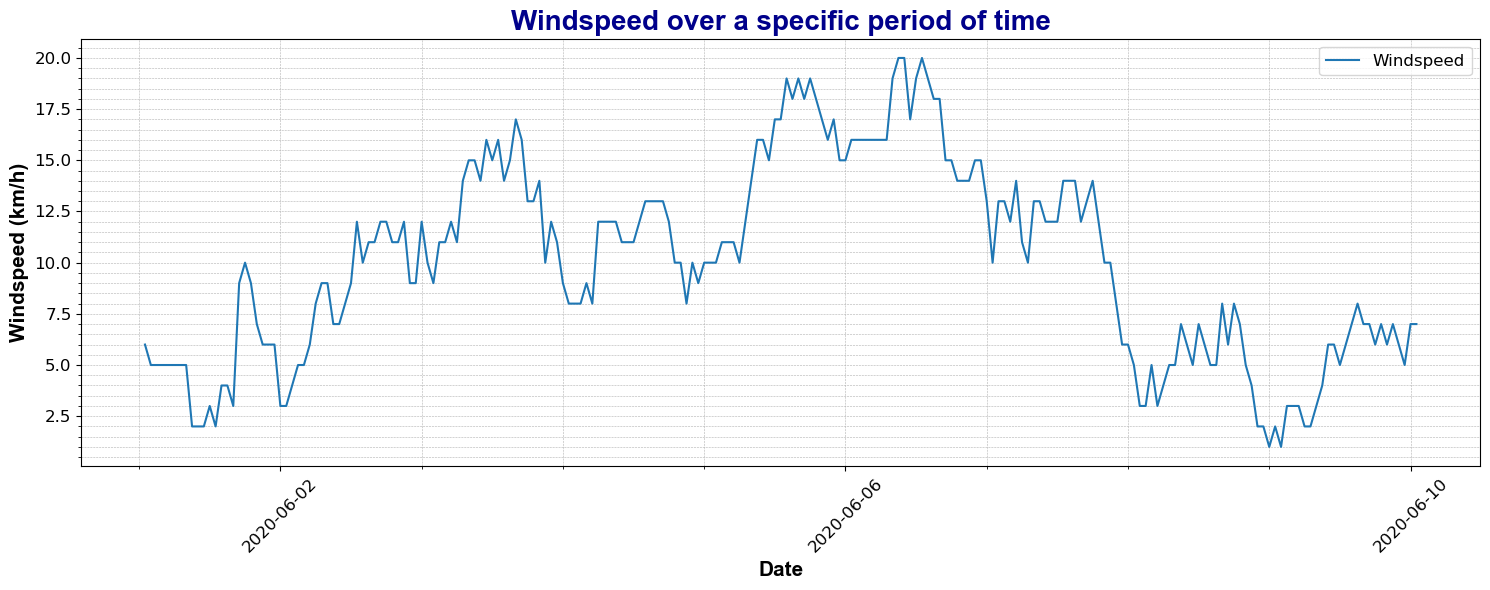

In [15]:
# Filter data for a specific period of time
startDate = "2020-06-01 01:00:00"
endDate = "2020-06-10 01:00:00"
filteredDf = df.loc[startDate:endDate]

# Plot with Seaborn
plt.figure(figsize=(15, 6))
sns.lineplot(data=filteredDf, x=filteredDf.index, y="wdsp")
plt.title('Windspeed over a specific period of time', fontsize=20, fontweight='bold', fontname='Arial', color='darkblue')
plt.xlabel('Date', fontsize=15, fontweight='bold', fontname='Arial')
plt.ylabel('Windspeed (km/h)', fontsize=15, fontweight='bold', fontname='Arial')
plt.grid(True, which='both', linestyle='--', linewidth=0.4)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.legend(['Windspeed'], loc='upper right', fontsize=12)

# Customize x-axis ticks and labels
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=4))  # Set major ticks to every day
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format the ticks to show date only
ax.xaxis.set_minor_locator(mdates.DayLocator())

# Add minor ticks on y-axis 
ax.yaxis.set_minor_locator(AutoMinorLocator())

# Adjust layout to fit labels
plt.tight_layout()
plt.show()


***

#### Plot the rolling Windspeed over a 24-hour period.

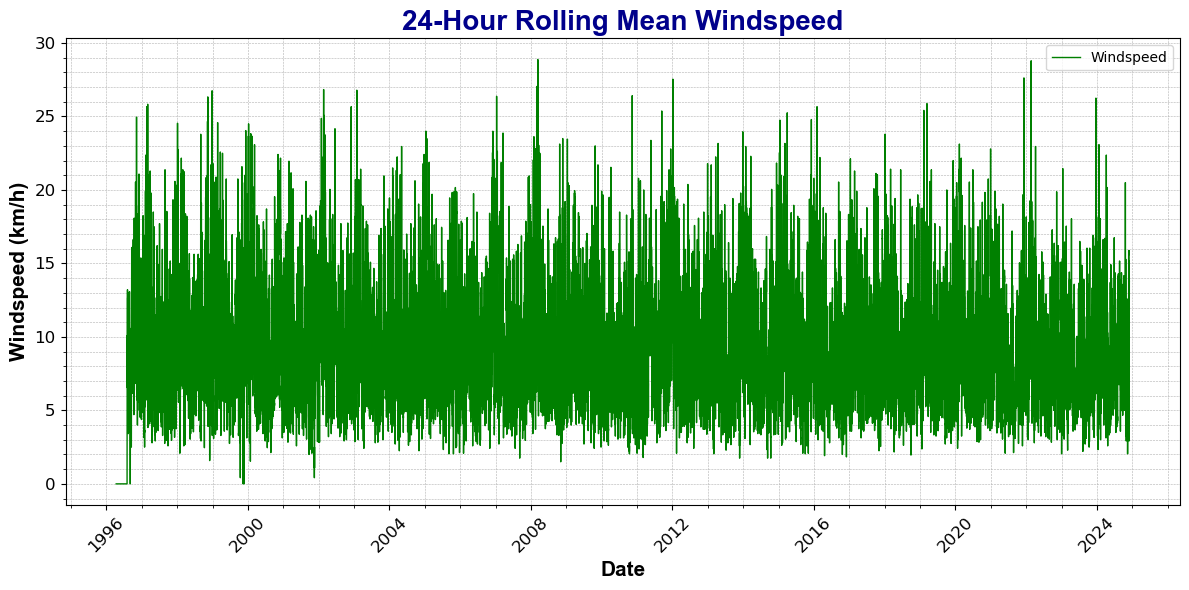

In [16]:
# Calculate the 24-hour rolling mean windspeed
df['rollingWindspeed'] = df['wdsp'].rolling(window='24h').mean()

# Plot with Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="date", y="rollingWindspeed", color='green', linestyle='-', linewidth=1)
plt.title('24-Hour Rolling Mean Windspeed', fontsize=20, fontweight='bold', fontname='Arial', color='darkblue')
plt.xlabel('Date', fontsize=15, fontweight='bold', fontname='Arial')
plt.ylabel('Windspeed (km/h)', fontsize=15, fontweight='bold', fontname='Arial')
plt.grid(True, which='both', linestyle='--', linewidth=0.4)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.minorticks_on()
plt.legend(['Windspeed'], loc='upper right', fontsize=10)
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

#### Plot the 24-hour rolling windspeed based on a selected range of data.

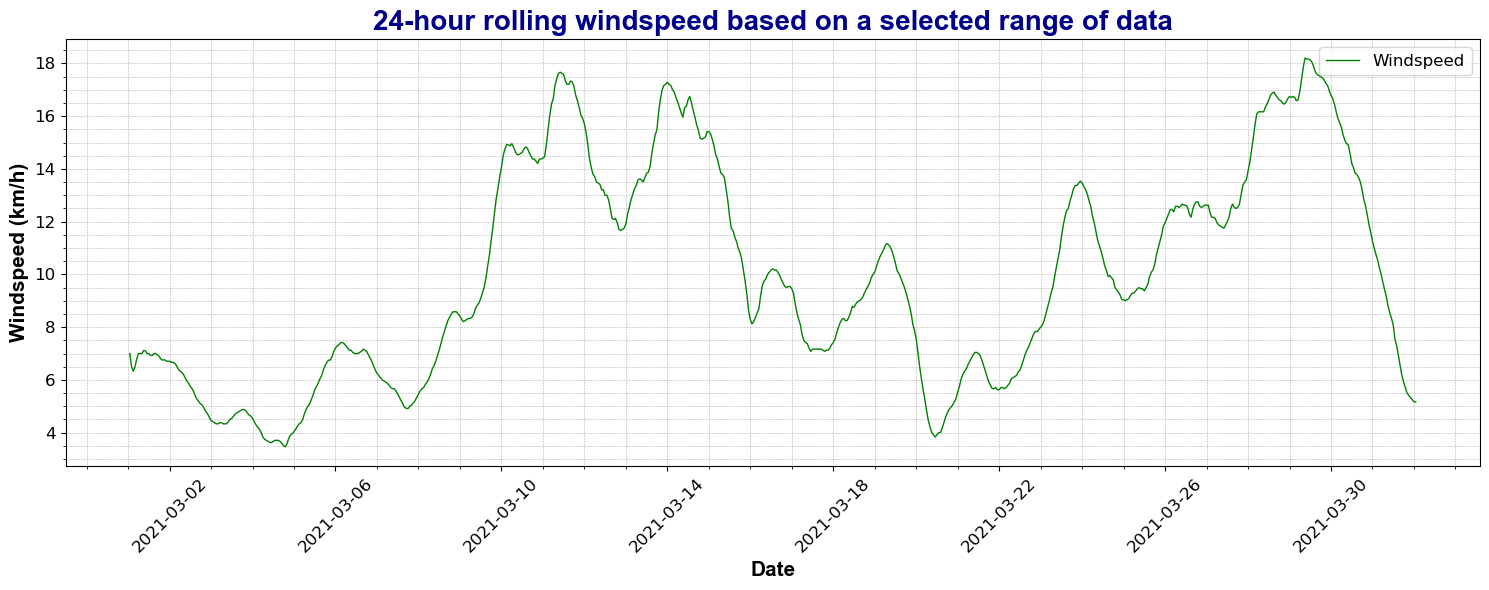

In [17]:
# Filter data for a specific period of time
startDate = "2021-03-01 01:00:00"
endDate = "2021-04-01 01:00:00"
filteredDf = df.loc[startDate:endDate]

# Calculate the 24-hour rolling mean windspeed 
filteredDf.loc[:, 'rollingWindspeed'] = filteredDf['wdsp'].rolling(window='24h').mean()

# Plot with Seaborn 
plt.figure(figsize=(15, 6))
sns.lineplot(data=filteredDf, x=filteredDf.index, y="rollingWindspeed", color='green', linestyle='-', linewidth=1)
plt.title('24-hour rolling windspeed based on a selected range of data', fontsize=20, fontweight='bold', fontname='Arial', color='darkblue')
plt.xlabel('Date', fontsize=15, fontweight='bold', fontname='Arial')
plt.ylabel('Windspeed (km/h)', fontsize=15, fontweight='bold', fontname='Arial')
plt.grid(True, which='both', linestyle='--', linewidth=0.4)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.legend(['Windspeed'], loc='upper right', fontsize=12)

# Customize x-axis ticks and labels
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=4))  # Set major ticks to every day
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format the ticks to show date only
ax.xaxis.set_minor_locator(mdates.DayLocator())

# Add minor ticks on y-axis 
ax.yaxis.set_minor_locator(AutoMinorLocator())

# Adjust layout to fit labels
plt.tight_layout()
plt.show()


In this plot, noise is reduced by the 24-hour rolling average, which smooths out sudden, short-term changes in wind speed. This allows the overall wind trend to be focused on without being distracted by temporary spikes or drops. Long-term patterns or trends in wind speed can be more easily spotted, making it easier to make decisions based on steady, reliable data.

***

#### Plotting the Windspeed over Time and 24-hour Rolling Mean Windspeed to show the effect of using 24-hour Rolling Mean.

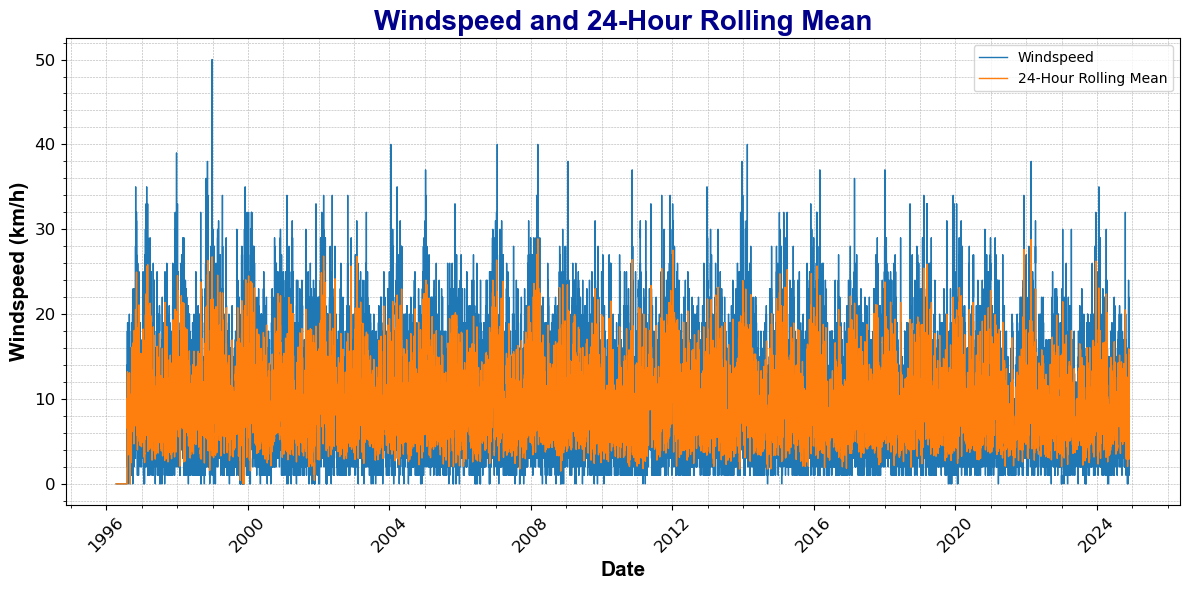

In [18]:
# Plot both the original windspeed and the rolling mean on the same plot
plt.figure(figsize=(12, 6))

# Original windspeed (Bright Blue)
sns.lineplot(data=df, x="date", y="wdsp", color='#1f77b4', linestyle='-', linewidth=1, label='Windspeed')

# 24-hour rolling mean (Orange)
sns.lineplot(data=df, x="date", y="rollingWindspeed", color='#ff7f0e', linestyle='-', linewidth=1, label='24-Hour Rolling Mean')

# Add titles and labels
plt.title('Windspeed and 24-Hour Rolling Mean', fontsize=20, fontweight='bold', fontname='Arial', color='darkblue')
plt.xlabel('Date', fontsize=15, fontweight='bold', fontname='Arial')
plt.ylabel('Windspeed (km/h)', fontsize=15, fontweight='bold', fontname='Arial')

# Add grid, ticks, and legend
plt.grid(True, which='both', linestyle='--', linewidth=0.4)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.minorticks_on()
plt.legend(loc='upper right', fontsize=10)
plt.tight_layout()  # Adjust layout to fit labels

plt.show()


In this plot, noise is reduced by the 24-hour rolling average, which smooths out sudden, short-term changes in wind speed. This allows the overall wind trend to be focused on without being distracted by temporary spikes or drops. Long-term patterns or trends in wind speed can be more easily spotted, making it easier to make decisions based on steady, reliable data.

***

#### Plot the Max Windspeed for Each Day.

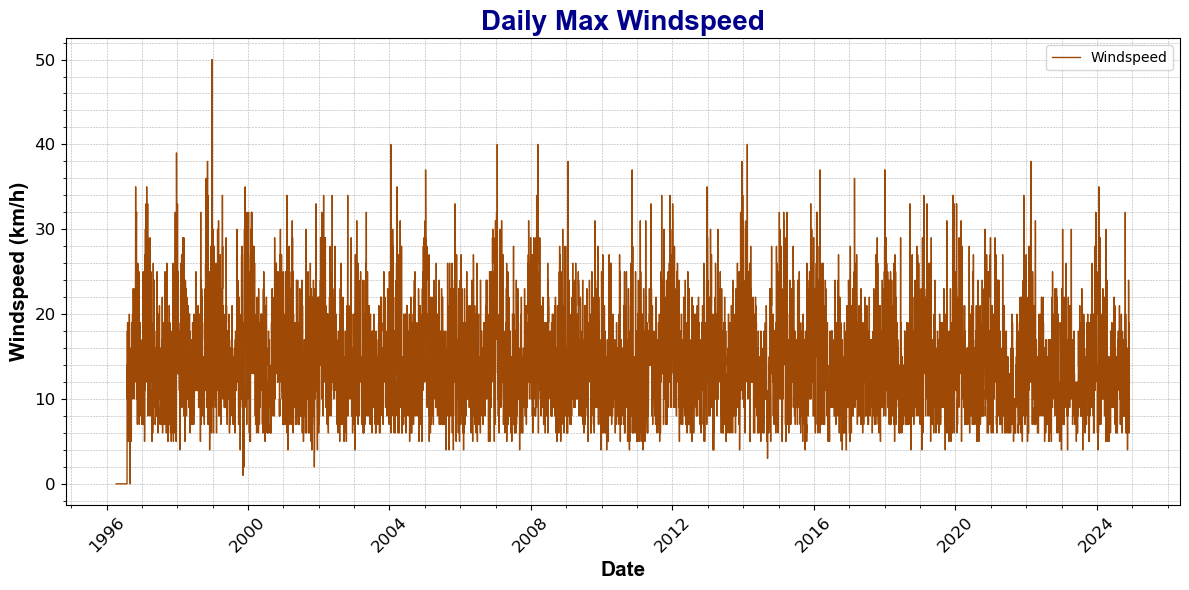

In [19]:
# Calculate the daily max windspeed
dfDailyMax = df['wdsp'].resample('D').max()

# Plot with Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=dfDailyMax, color='#9E4A06', linestyle='-', linewidth=1)
plt.title('Daily Max Windspeed', fontsize=20, fontweight='bold', fontname='Arial', color='darkblue')
plt.xlabel('Date', fontsize=15, fontweight='bold', fontname='Arial')
plt.ylabel('Windspeed (km/h)', fontsize=15, fontweight='bold', fontname='Arial')
plt.grid(True, which='both', linestyle='--', linewidth=0.4)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.minorticks_on()
plt.legend(['Windspeed'], loc='upper right', fontsize=10)
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

[Blog by Ben Alex Keen](https://benalexkeen.com/resampling-time-series-data-with-pandas/#:~:text=6.25-,Resampling%20options,-pandas%20comes%20with)  provides handy information on how to use `resample()`.

The plot is hard to read, so the range of data should be narrowed.

#### Plot the Daily max Windspeed over a specific period of time.

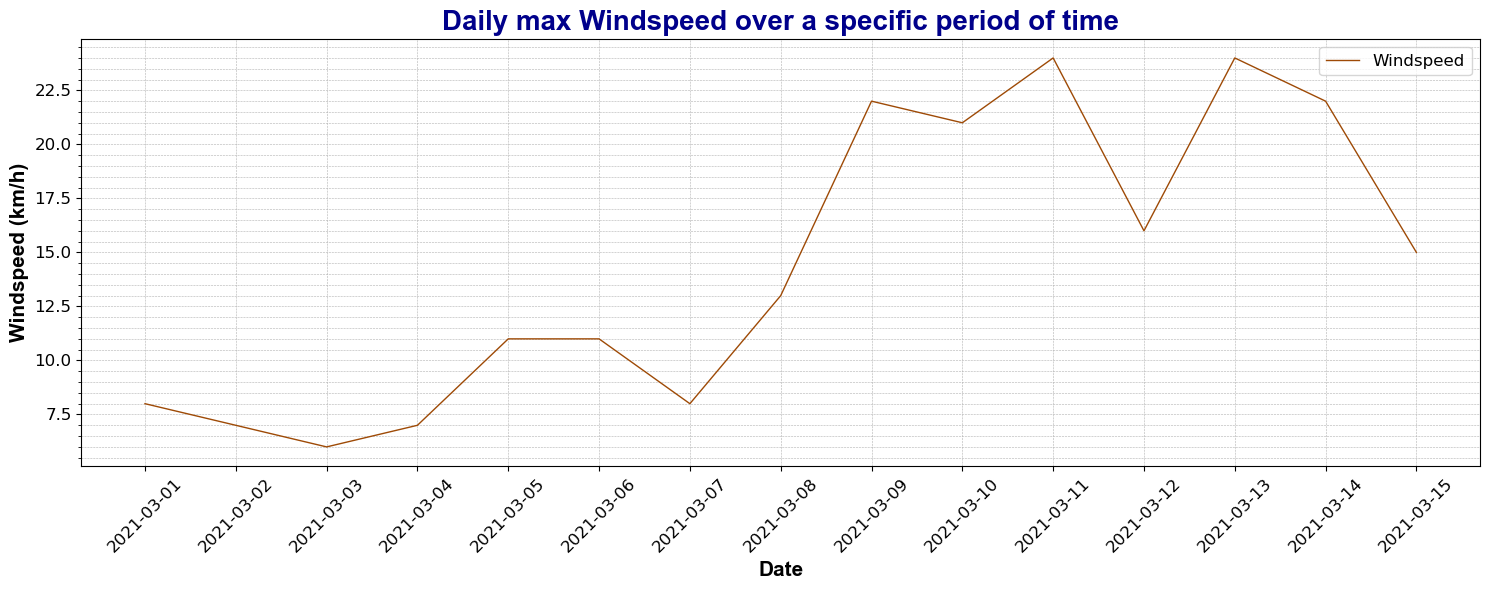

In [20]:
# Filter data for a specific period of time
startDate = "2021-03-01 01:00:00"
endDate = "2021-03-15 01:00:00"
filteredDf = df.loc[startDate:endDate]


# Calculate the daily max windspeed for the filtered data
dailyMaxWindspeed = filteredDf['wdsp'].resample('D').max()

# Plot with Seaborn
plt.figure(figsize=(15, 6))
sns.lineplot(data=dailyMaxWindspeed, color='#9E4A06', linestyle='-', linewidth=1)
plt.title('Daily max Windspeed over a specific period of time', fontsize=20, fontweight='bold', fontname='Arial', color = 'darkblue')
plt.xlabel('Date', fontsize=15, fontweight='bold', fontname='Arial')
plt.ylabel('Windspeed (km/h)', fontsize=15, fontweight='bold', fontname='Arial')
plt.grid(True, which='both', linestyle='--', linewidth=0.4)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.legend(['Windspeed'], loc='upper right', fontsize=12)

# Customize x-axis ticks and labels
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Set major ticks to every day
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format the ticks to show date only
ax.xaxis.set_minor_locator(mdates.DayLocator())

# Add minor ticks on y-axis 
ax.yaxis.set_minor_locator(AutoMinorLocator())

# Adjust layout to fit labels
plt.tight_layout()
plt.show()


***

#### Plot the Monthly Mean of the Daily Max Windspeeds.

`dfDailyMAx` is taken from the previous plot exactly from the Daily Max Windspeed plot.

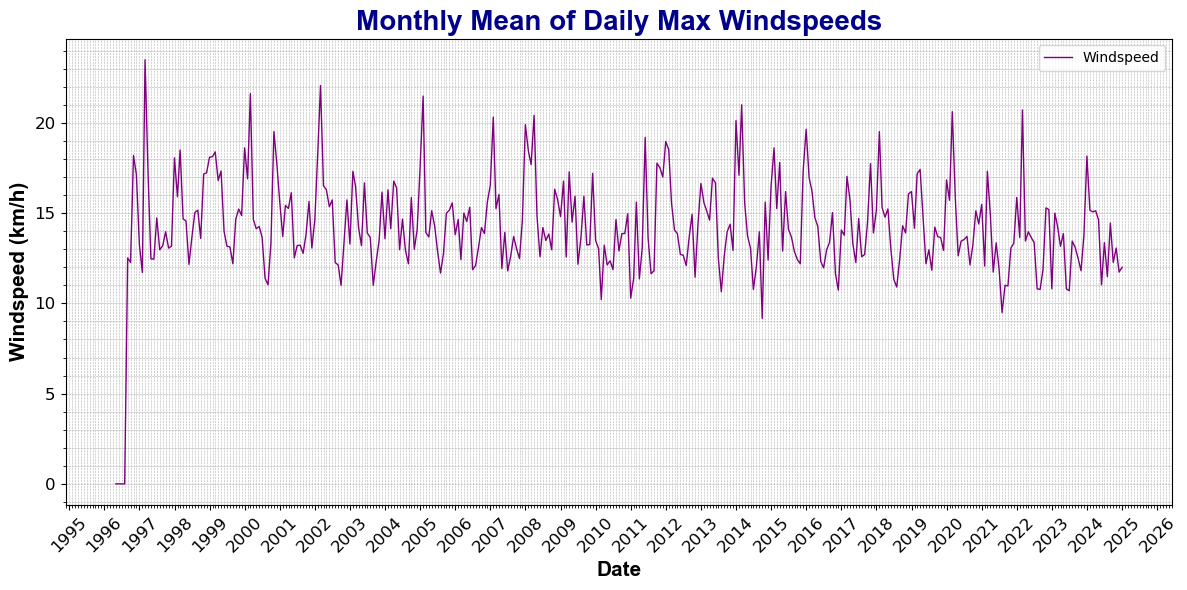

In [21]:
# Calculate the monthly mean of daily max windspeeds
dfMonthlyMeanOfMax = dfDailyMax.resample('M').mean()

# Plot with Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=dfMonthlyMeanOfMax, color='purple', linestyle='-', linewidth=1)
plt.title('Monthly Mean of Daily Max Windspeeds', fontsize=20, fontweight='bold', fontname='Arial', color='darkblue')
plt.xlabel('Date', fontsize=15, fontweight='bold', fontname='Arial')
plt.ylabel('Windspeed (km/h)', fontsize=15, fontweight='bold', fontname='Arial')
plt.grid(True, which='both', linestyle='--', linewidth=0.4)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Customize x-axis ticks and labels
ax = plt.gca()
# Set major ticks to every year
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())

# Add minor ticks on y-axis 
ax.yaxis.set_minor_locator(AutoMinorLocator())

plt.legend(['Windspeed'], loc='upper right', fontsize=10)
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


#### Plot representing one year of the monthly mean of daily max windspeeds.

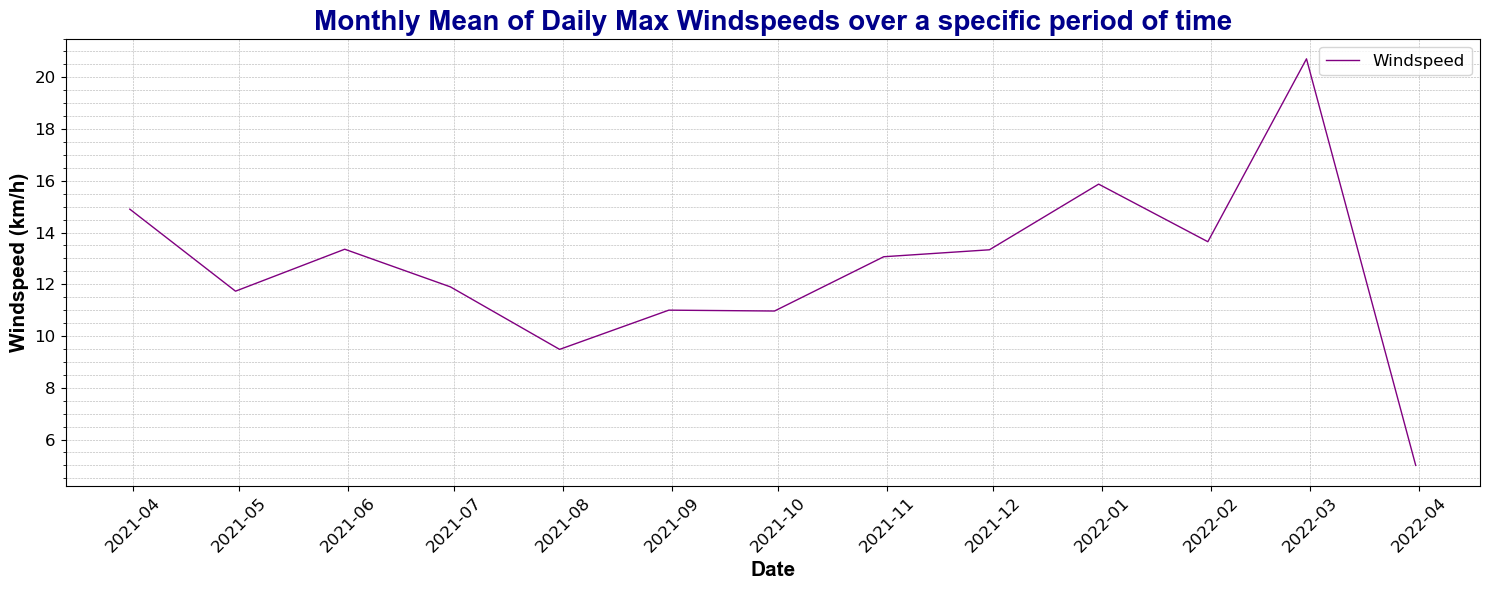

In [22]:
# Filter data for a specific period of time
startDate = "2021-03-01 01:00:00"
endDate = "2022-03-01 01:00:00"
filteredDf = df.loc[startDate:endDate]

# Calculate the monthly mean of daily max windspeeds for the filtered data
filteredDfDailyMax = filteredDf['wdsp'].resample('D').max()
filteredDfMonthlyMeanOfMax = filteredDfDailyMax.resample('M').mean()

# Plot with Seaborn
plt.figure(figsize=(15, 6))
sns.lineplot(data=filteredDfMonthlyMeanOfMax, color='purple', linestyle='-', linewidth=1)
plt.title('Monthly Mean of Daily Max Windspeeds over a specific period of time', fontsize=20, fontweight='bold', fontname='Arial', color='darkblue')
plt.xlabel('Date', fontsize=15, fontweight='bold', fontname='Arial')
plt.ylabel('Windspeed (km/h)', fontsize=15, fontweight='bold', fontname='Arial')
plt.grid(True, which='both', linestyle='--', linewidth=0.4)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Customize x-axis ticks and labels
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Add minor ticks on y-axis
ax.yaxis.set_minor_locator(AutoMinorLocator())

plt.legend(['Windspeed'], loc='upper right', fontsize=12)
plt.tight_layout()
plt.show()


#### Summary
In the notebook, multiple plots are created to visualize data, with the range of data often being narrowed to improve readability. After making the main plot, a related plot is shown using a selected data range to highlight how a wide range can be difficult to interpret. Techniques such as resampling and rolling averages are applied to smooth the data, providing more precise insights and trends.

***

End